<a href="https://colab.research.google.com/github/washington-jesus-leite/Python-Controle-de-Caixa/blob/main/Copy_of_PID_Washington.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random #Numero aleatorio
import cv2 #biblioteca de tratamento de imagem
import numpy as np #Tratamento de numeros, numpy
from PIL import Image,ImageOps # Objeto imagem
import matplotlib.pyplot as plt #Geração de gráfico
from matplotlib import image as img
from google.colab.patches import cv2_imshow #Mostrar a imagem do cv2

In [ ]:
#Alterar Brilho
def alterabrilho(image):
    alpha = 5  # Controle de Contraste  (1.0-3.0)
    beta = 0  # Controle de Brilho (0-100)

    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    cv2_imshow(image) #Exibe a imagem
    cv2_imshow(adjusted)


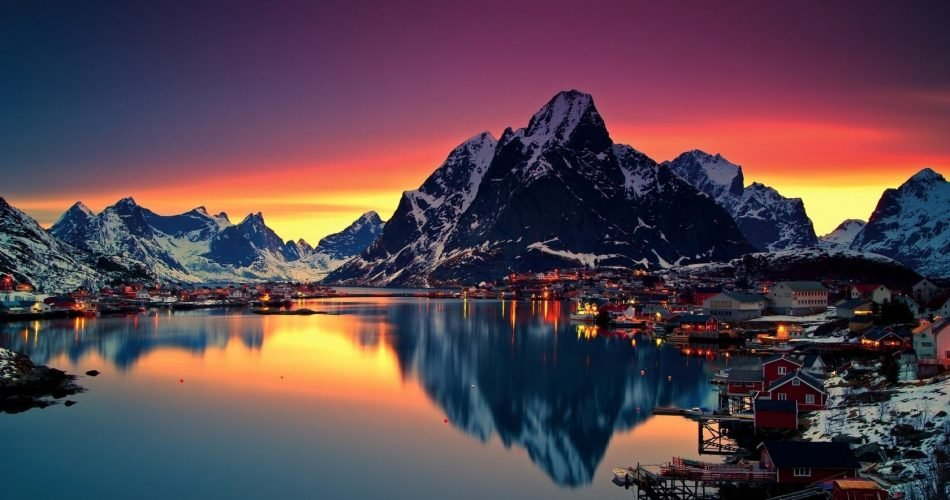

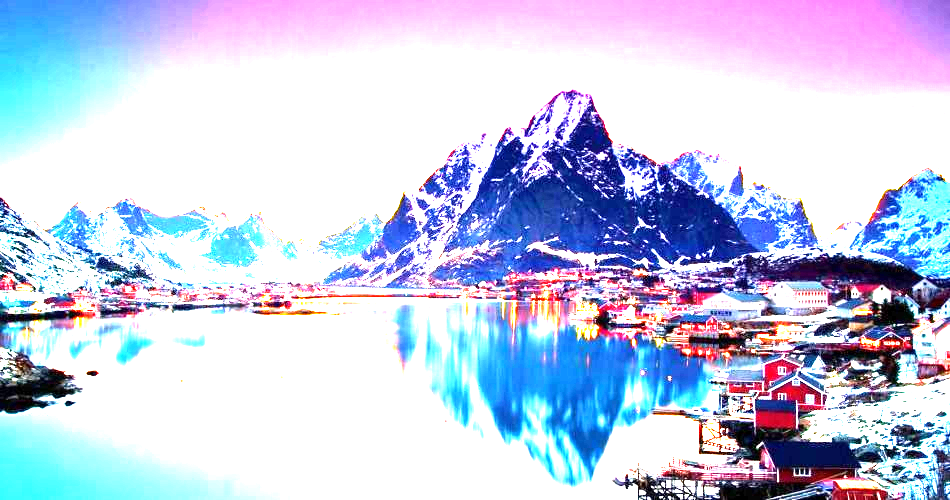

In [ ]:
foto = cv2.imread('montanha.jpg') #Salva a imagem em formato de matriz na variavel 
alterabrilho(foto) #Chama a função criada acima

In [ ]:
#Inverter a imagem
def negativo(image:Image):
    if image.mode == 'RGBA': #Red, Green, Blue, Intensidade
        r, g, b, a = image.split() #Separa as cores
        rgb_image = Image.merge('RGB', (r, g, b)) #Junta sem o A

        inverted_image = ImageOps.invert(rgb_image) #Inverte a imagem
        r2, g2, b2 = inverted_image.split() #Separa as cores da nova imagem

        final_transparent_image = Image.merge('RGBA', (r2, g2, b2, a)) #Junta o A de novo
        cv2_imshow(np.asarray(final_transparent_image)) #Exibe a imagem

    else: #Caso seja RGB apenas
        inverted_image = ImageOps.invert(image) #Inverte a imagem
        cv2_imshow(np.asarray(inverted_image)) #Exibe



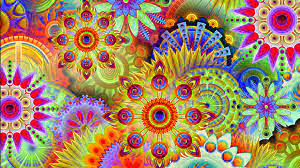

In [ ]:
image = Image.open('flores.jpeg')

negativo(image)

In [ ]:
#Histogramas da imagem em cinza
#Recebe ou o nome da foto, ou um objeto array que representa uma foto
def histcinza(nome:str):
    if not isinstance(nome, np.ndarray): #Se não for direto os valores dos pixels
        imag = cv2.imread(nome, 0) #Lê o nome da imagem e vetoriza a imagem cinza
    else: #Se for os valores dos pixels direto, faz a alteração para cinza
        imag = cv2.cvtColor(nome, cv2.COLOR_RGB2GRAY)
        
    plt.hist(imag.ravel(), 256, [0, 256]) #Gera o gráfico histograma


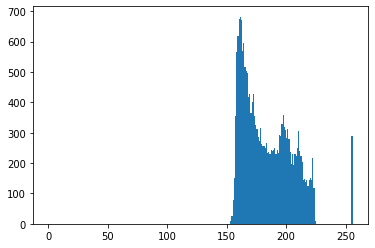

In [ ]:
histcinza("gato.png") #chama a função



In [ ]:
#Histograma da imagem colorida (Na dúvida foi feito colorido também)
def histcolorido(arquivo):
    img = cv2.imread(arquivo) #Lê a imagem
    colors = ('r', 'g', 'b') #Cria uma tupla de cores
    for i, col in enumerate(colors): #Faz o loop pelas cores
        hist = cv2.calcHist([img], [i], None, [256], [0, 256]) #Cria o histograma de cada cor
        plt.plot(hist, color=col) #Coloca no gráfico
        plt.xlim((0, 256)) #Limita o gráfico entre 0 e 255
        
    plt.show() #Exibe o gráfico




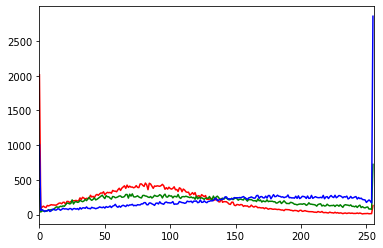

In [ ]:
histcolorido('flores.jpeg')#chama a função

In [ ]:
#Ruido sal e pimenta entre 10% e 20% em branco e em preto na imagem cinza
def ruido(ilustra):
        row, col = ilustra.shape #Traz a altura e largura da imagem e salva
        pixels=row*col #Quantidade total de pixels

        #0.1 é o mesmo que 10% e 0.2 representa 20%
        n_de_pixels = random.randint(pixels*.1,pixels*.2)#Define o tanto de ruido
        for i in range(n_de_pixels):# Para cada um da quantidade
                y_coord = random.randint(0, row - 1) #Sorteia um y
                x_coord = random.randint(0, col - 1) #Sorteia um x
                ilustra[y_coord][x_coord] = 255 #Troca o pixel sorteado por branco

        n_de_pixels = random.randint(pixels*.1,pixels*.2)
        for i in range(n_de_pixels):
                y_coord = random.randint(0, row - 1) #Sorteia um y
                x_coord = random.randint(0, col - 1) #Sorteia um x
                ilustra[y_coord][x_coord] = 0 #Troca o pixel sorteado por preto

        return ilustra
    


In [ ]:
foto = cv2.imread('montanha.jpg',0) # Salva a foto da montanha em cinza
cv2_imshow(ruido(foto)) #chama a função

In [ ]:
#Quantizar é mudar a quantidade de cores da foto
def quantizar(arquivo,cores):
    foto = cv2.imread(arquivo) #Lê o nome do arquivo
    img_gaussian = cv2.GaussianBlur(foto, (3, 3), 0) #Usa o filtro gaussiano para embaçar
    img_float = img_gaussian.reshape((-1, 3)) #Reorganiza

    # converte para numpy float32 para realizar as operações
    img_float = np.float32(img_float)

    # define critérios e aplica a função cv2.kmeans()
    criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    # Aplica o kmeans do cv2
    dist, omega, img_centro = cv2.kmeans(img_float, cores, None, criterio, 10, cv2.KMEANS_RANDOM_CENTERS)

    # Converte de volta para uint8, transformando em formato imagem
    img_centro = np.uint8(img_centro) #Transforma para inteiro de volta
    resultado = img_centro[omega.flatten()] #Reorganiza os pixels
    resultado = resultado.reshape(foto.shape)

    cv2_imshow(resultado) # Mostra o resultado da quantização




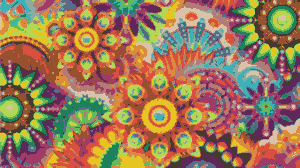

In [ ]:
quantizar('flores.jpeg',15)#chama a função

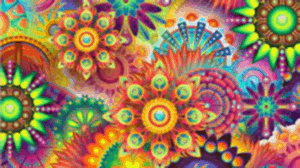

In [ ]:
quantizar('flores.jpeg',250)#chama a função

In [ ]:
#Equalizar é equilibrar o histograma
def equalizarhistograma(nome):

    img = cv2.imread(nome) #Lê a imagem
    img_to_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)  # Usa BGR pois o opencv trabalha com BGR e não RGB

    img_to_yuv[:, :, 0] = cv2.equalizeHist(img_to_yuv[:, :, 0]) #Troca a imagem pela equalizada

    hist_equalization_result = cv2.cvtColor(img_to_yuv, cv2.COLOR_YUV2BGR) #Troca a cor yuv de volta para rgb
    cv2_imshow(img) #Mostra a imagem original
    cv2_imshow(hist_equalization_result) #Mostra a imagem equalizada
    histcinza(hist_equalization_result) #Plota o histograma equalizado


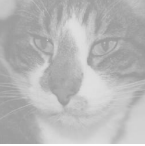

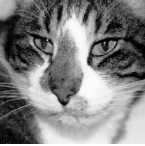

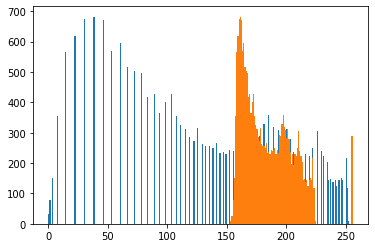

In [ ]:
equalizarhistograma('gato.png')#Chama a função equalizar
histcinza("gato.png") #Mostra o histograma original por cima do equalizado

In [ ]:
#Tranforma a imagem apenas em bordas através da detecção
def deteccaodebordas(nome):
    
    foto = cv2.imread(nome) #Lê a imagem
    gray = cv2.cvtColor(foto, cv2.COLOR_BGR2GRAY) #Transforma em cinza
    img_gaussian = cv2.GaussianBlur(gray, (3, 3), 0) #Embaça com filtro gaussiano

    #Critério do kernel das bordas
    kernel = np.array([[-1.5, -1.5, -1.5], [-1.5, 12, -1.5], [-1.5, -1.5, -1.5]])


    img_karnel = cv2.filter2D(foto, -1, kernel)  # Aplica o filtro de karnel na imagem
    foto = img_karnel  # Atualiza a img a ser editada, para poder realizar edição sobre edição.

    cv2_imshow(img_karnel)


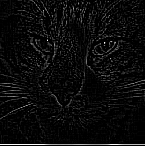

In [ ]:
deteccaodebordas('gato.png')

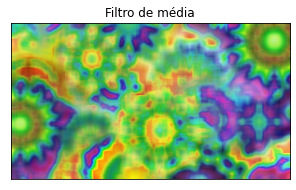

In [ ]:
def filtrodemedia(nome:str):
    image = cv2.imread(nome) # Lê a foto
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # converte para HSV
    bloco = 9 # the dimension of the x and y axis of the kernal.
    new_image = cv2.blur(image,(bloco, bloco)) #Aplica o filtro de média
    plt.figure(figsize=(11,6))
    plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Filtro de média') #Define o subplot da imagem
    plt.xticks([]), plt.yticks([]) #Exclui a numeração do "gráfico"
    plt.show() #Exibe a imagem com o filtro
    
filtrodemedia('flores.jpeg')

In [ ]:
def filtromediana(nome):
    image = cv2.imread(nome)  # reads the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # convert to HSV

    bloco = 25 #Quantidade do bloco de pixels (25 representa um quadrado 5 por 5)

    #Muda o código de cores de HSV para BGR e então para GRAY
    image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR) 
    image2= cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    new_image = cv2.medianBlur(image2, bloco) #Aplica o filtro de mediana

    #Dimensiona a figura dos resultados
    plt.figure(figsize=(11, 6))
    plt.subplot(121), plt.imshow(image2, cmap='gray'), plt.title('Original') #Plota a imagem original
    plt.xticks([]), plt.yticks([]) #Exclui a numeração do "gráfico"
    plt.subplot(122), plt.imshow(new_image, cmap='gray'), plt.title('Filtro de Mediana') #plota a imagem borrada
    plt.xticks([]), plt.yticks([]) #Exclui a numeração do "gráfico"
    filtrodemedia(nome) #Chama o filtro de média da imagem
    plt.show() #Exibe os resultados



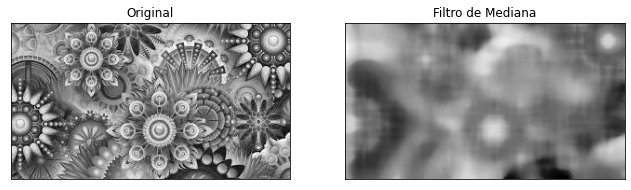

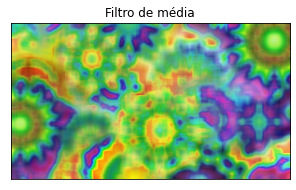

In [ ]:
filtromediana('flores.jpeg') #Chama a função

In [ ]:
#Filtro Gaussiano
def filtrogauss(nome):
    image = cv2.imread(nome) # reads the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
    bloco=9

    new_image = cv2.GaussianBlur(image, (bloco, bloco),0)
    #Dimensiona as figuras do resultado
    plt.figure(figsize=(11,6))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original') #plota a imagem original
    plt.xticks([]), plt.yticks([]) #Exclui a numeração da legenda
    plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Filtro Gaussiano')#Plota a imagem com filtro
    plt.xticks([]), plt.yticks([]) #Exclui a numeração da legenda
    filtrodemedia(nome) #Chama o filtro de média
    plt.show() #Exibe os resultados


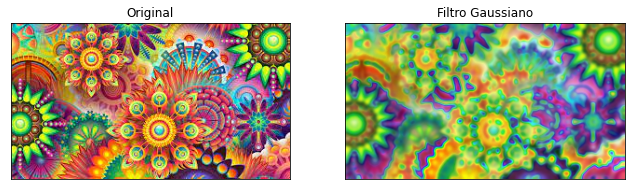

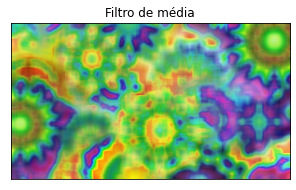

In [ ]:
filtrogauss('flores.jpeg') #Chama a função

In [ ]:
#Particionamento da imagem: divide a imagem em 3 terços cortados verticalmente e obtem o histograma de cada terço
def particionaimagem(nome):
    original = Image.open(nome) #Transforma a imagem original em um objeto Image

    width, height = original.size   # Obtem o tamanho
    bottom = height #Define o ponto de baixo da figura
    top = 0 #Define o ponto do topo da figura, sendo que cresce de cima pra baixo o eixo y
    for i in range(3):#Repete 3 vezes
        # O ponto à esquerda da figura é definido como o valor da repetição vezes a largura da imagem/3, 
        # encontrando assim a esquerda de cada retangulo
        left = i*width/3 
        #O mesmo ocorre com a direita do retangulo, porém com +1 para ser a borda seguinte
        right = (i+1)*width/3
        
        cropped = original.crop((left, top, right, bottom)) #É definido um recorte "crop", que obtém a imagem de cada retangulo
        
        # A imagem precisa ser transformada em array para ser gerado o histograma, 
        # pois não é possível gerar histograma do objeto Image, apenas de matrizes numéricas
        histcinza(np.asarray(cropped)) # É gerado um histograma de cada retangulo obtido no mesmo gráfico
        
    


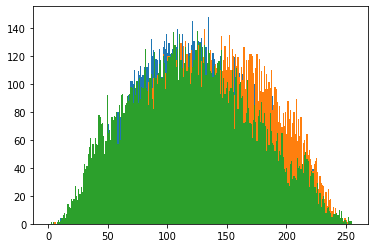

In [ ]:
imagem = "flores.jpeg"
particionaimagem(imagem) #Particiona a imagem com o nome definido acima e gera os 3 histogramas